# 🐶 Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
labels_csv = pd.read_csv("labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [4]:
print(labels_csv.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


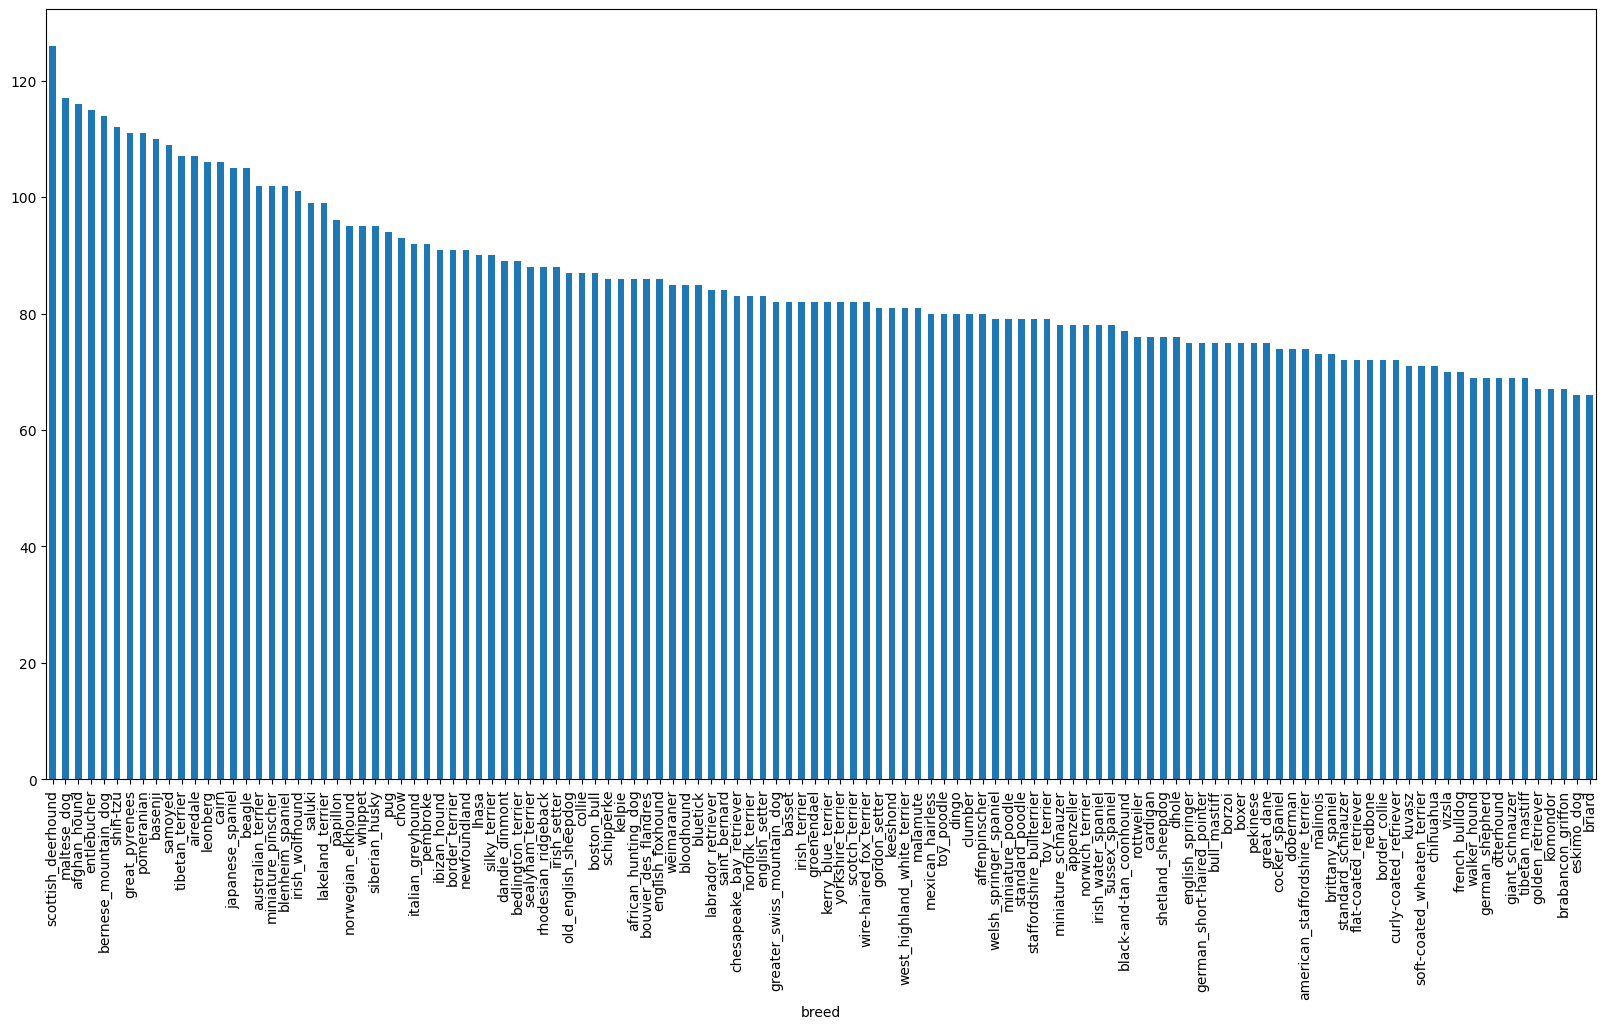

In [5]:
# How many images are there of each breed ?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [6]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [7]:
float(labels_csv['breed'].value_counts().median())

82.0

## Getting images and their labels

In [8]:
from IPython.display import display, Image

In [9]:
# Create pathnames from image ID's
filenames = ["train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

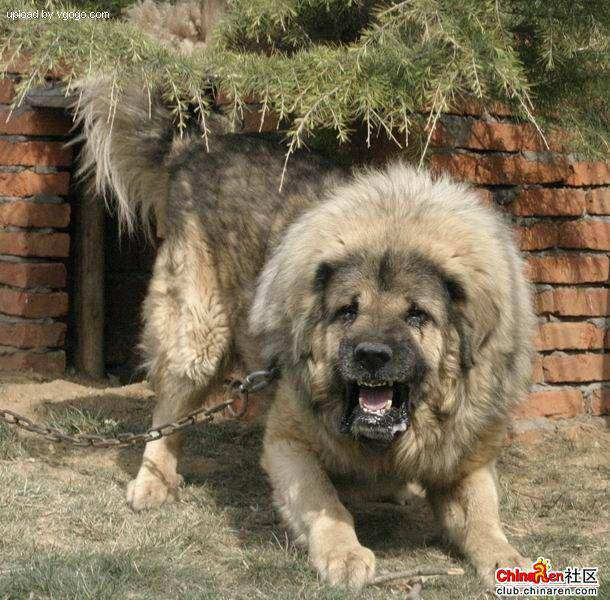

In [10]:
# Check an image directly from a filepath
Image(filenames[9000])

In [11]:
# Turning image labels into numpy arrays
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [12]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [13]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [14]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [15]:
# Example: Turning a boolean array into integers -> One Hot Encoding
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating validation set

In [16]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [17]:
len(filenames)

10222

### Start of with 1000 images and increase as needed

In [18]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [19]:
# Splitting the data into training and validation sets : 80/20
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [20]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

## Preprocessing the images -> tensors

In [21]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [22]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], shape=(2, 350, 3), dtype=uint8)>

### To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, image.
3. Turn our image (a jpeg file) into Tensors.
4. Resize the image to be of shape (224, 224).
5. Return the modified image.

In [23]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Turning the data into batches

In [24]:
def get_image_label(image_path, label):

    image = process_image(image_path)
    return image, label

In [25]:
#Demo of the above function
get_image_label(X[42], tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [26]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [27]:
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [28]:
#Check out the difference between attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [29]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    #Loop through 25 images
    for i in range(25):
        #create subplots 5*5
        ax = plt.subplot(5, 5, i+1)
        #display image
        plt.imshow(images[i])
        #add image label as title
        plt.title(unique_breeds[labels[i].argmax()])
        #Turn the grid lines off
        plt.axis("off")
        

In [30]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [31]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[4.71645862e-01, 4.82216507e-01, 2.98427194e-02],
          [4.83804643e-01, 5.08373678e-01, 1.20379411e-01],
          [3.79734337e-01, 4.25497651e-01, 1.41939536e-01],
          ...,
          [2.62600571e-01, 3.44742507e-01, 4.69493568e-02],
          [2.72979975e-01, 3.21870267e-01, 2.19253991e-02],
          [3.42795312e-01, 3.87245595e-01, 8.39892775e-02]],
 
         [[4.63500589e-01, 4.93406594e-01, 5.43511100e-02],
          [4.86727059e-01, 5.32677650e-01, 1.00065820e-01],
          [3.87133121e-01, 4.62309599e-01, 4.37073112e-02],
          ...,
          [3.46820116e-01, 4.12491769e-01, 1.06310375e-01],
          [2.83976972e-01, 3.54605526e-01, 6.44418001e-02],
          [2.45693818e-01, 3.16352040e-01, 2.61734836e-02]],
 
         [[4.89769369e-01, 5.35706818e-01, 1.75692320e-01],
          [4.61337537e-01, 5.26827037e-01, 1.05290554e-01],
          [4.52609837e-01, 5.46482384e-01, 5.38912453e-02],
          ...,
          [3.12266856e-01, 3.66853714e-01, 6.4262

In [32]:
unique_breeds[y[0].argmax()]

'boston_bull'

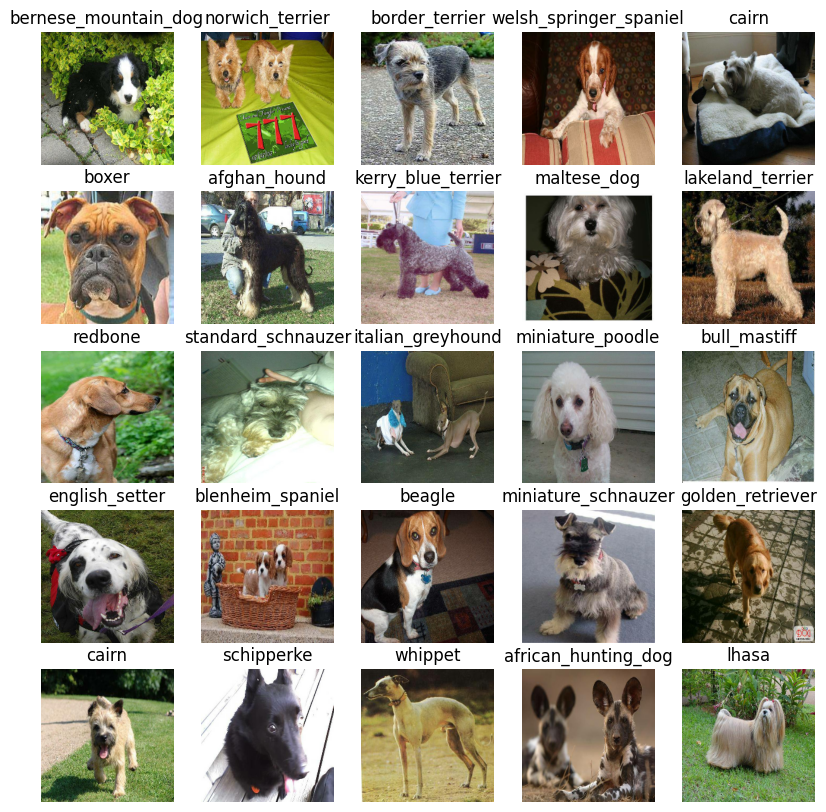

In [33]:
# Visualize Data in Training Batch Images
show_25_images(train_images, train_labels)

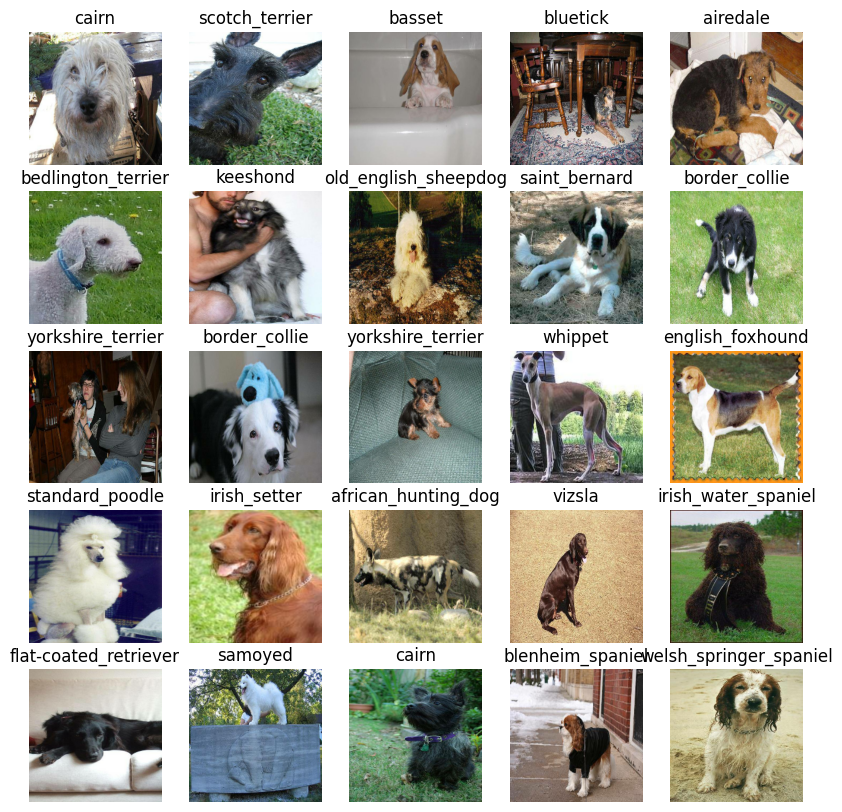

In [34]:
# Visualoze Validation Set
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model
#### Before we build a model, there are a few things we need to define:

1. The input shape (images, in the form of Tensors) to our model.
2. The output shape (image labels, in the form of Tensors) of our model.
3. The URL of the model we want to use.

#### These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.

* Define the layers in a Keras model in sequential fashion
* Compile the model (evaluation and improvement)
* Build & returns the model

In [35]:
INPUT_SHAPE = (224,224,3)
OUTPUT_SHAPE = len(unique_breeds)

In [36]:
def create_model(input_shape=INPUT_SHAPE):
    base_model = tf.keras.applications.MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    
    base_model.trainable = False  # freeze pretrained weights
    
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(OUTPUT_SHAPE, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [37]:
model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,411,704 (9.20 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Creating callbacks

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

### TensorBoard Callback
TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize the our models training logs using the %tensorboard magic function

In [38]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [39]:
import os
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("logs/",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [40]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [41]:
NUM_EPOCHS = 100

In [42]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            batch_size = BATCH_SIZE,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [43]:
#Fit the model
model = train_model()

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.0988 - loss: 4.4584 - val_accuracy: 0.2550 - val_loss: 3.5897
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6313 - loss: 1.9302 - val_accuracy: 0.4800 - val_loss: 2.3705
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9187 - loss: 0.8708 - val_accuracy: 0.5600 - val_loss: 1.9185
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9750 - loss: 0.4621 - val_accuracy: 0.5850 - val_loss: 1.7154
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9925 - loss: 0.2869 - val_accuracy: 0.6050 - val_loss: 1.6334
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9962 - loss: 0.1984 - val_accuracy: 0.6100 - val_loss: 1.5555
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9975 - loss: 0.1490 - val_accuracy: 0.6300 - val_loss: 1.5303
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.1168 - val_accuracy: 0.6150 - v

#### Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

In [51]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 2664), started 16:24:55 ago. (Use '!kill 2664' to kill it.)

## Make predictions on validation data

In [45]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(valid_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


array([[4.7865545e-04, 2.1523577e-03, 1.5125801e-04, ..., 9.6959731e-05,
        1.1255337e-04, 1.0968265e-03],
       [5.2433304e-04, 1.2817397e-03, 4.1069994e-03, ..., 4.1837053e-04,
        7.4629351e-03, 8.8993533e-05],
       [2.0220748e-05, 1.0715206e-03, 3.6219458e-04, ..., 3.5146237e-04,
        7.0049959e-05, 1.0449939e-03],
       ...,
       [6.7480019e-04, 1.9473056e-03, 4.2791318e-04, ..., 6.9671887e-04,
        2.1024424e-04, 2.3823633e-04],
       [3.7540475e-04, 1.5731675e-04, 3.9595002e-04, ..., 3.9877545e-05,
        4.8576370e-05, 4.5096632e-03],
       [3.3311613e-04, 3.1511681e-05, 5.0181744e-04, ..., 1.5567705e-03,
        9.9034142e-04, 1.3342568e-03]], shape=(200, 120), dtype=float32)

In [46]:
# Check the shape of predictions
predictions.shape

(200, 120)

In [47]:
# First prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[index])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[index])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}") # the predicted label

[4.78655449e-04 2.15235772e-03 1.51258006e-04 4.98510548e-04
 1.86231206e-04 2.32129270e-04 5.00079617e-03 3.21570260e-04
 1.07756676e-03 1.73088163e-04 4.40874865e-04 4.28656465e-04
 3.94264680e-05 9.34190030e-05 1.03976496e-03 9.95971059e-05
 1.19854658e-05 1.07801370e-02 5.25556570e-05 1.16358555e-04
 8.12737562e-04 2.98810861e-04 1.19996083e-04 2.91201449e-03
 1.72933269e-05 3.65103151e-05 3.39531898e-03 9.00378800e-05
 4.49878658e-04 2.19735768e-04 1.59771080e-05 2.28060968e-03
 1.74292902e-04 1.21825891e-04 1.50245163e-04 5.36580198e-03
 3.72588765e-05 9.33953561e-06 1.02314028e-04 2.44072980e-05
 4.25649487e-04 7.09019514e-05 2.31221857e-05 4.39173818e-05
 2.63443770e-04 1.07561129e-04 1.07047254e-05 9.87957465e-05
 3.12312593e-04 2.33509199e-04 3.26543122e-05 2.75610946e-04
 1.71432178e-03 3.72419636e-05 2.80606273e-05 1.01813084e-05
 7.66108133e-05 2.23298115e-03 2.48725992e-04 9.70900878e-02
 4.84298420e-04 9.25362910e-05 8.25514944e-05 3.29577269e-05
 2.34790743e-04 2.537786

In [48]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label


'lhasa'

In [49]:
valid_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [52]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [53]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

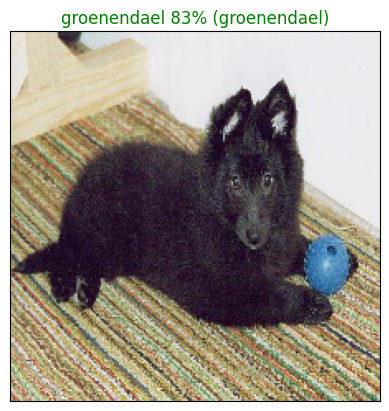

In [56]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Build a function to demonstrate. The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:
   * Prediction probabilities indexes
   * Prediction probabilities values
   * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [58]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

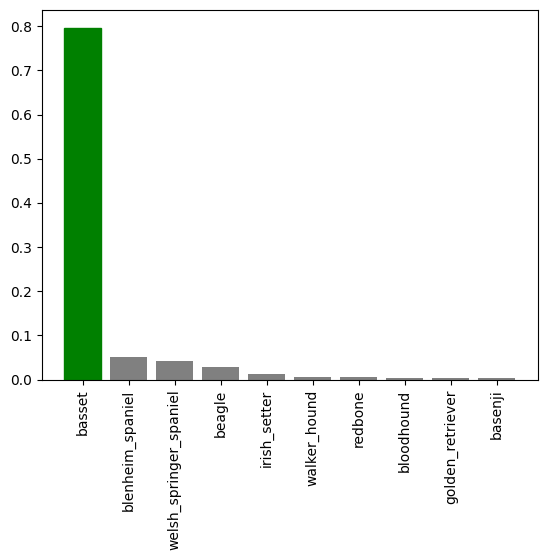

In [61]:
#Top 10 predictions for a label
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=2)

## Training the model on full training data

In [65]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

In [66]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [67]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

In [68]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [70]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.6102 - loss: 1.5751
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 294s 919ms/step - accuracy: 0.8340 - loss: 0.5724
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 295s 923ms/step - accuracy: 0.8989 - loss: 0.3697
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 296s 924ms/step - accuracy: 0.9392 - loss: 0.2553
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 296s 925ms/step - accuracy: 0.9650 - loss: 0.1854
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 313s 979ms/step - accuracy: 0.9818 - loss: 0.1332
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9884 - loss: 0.1013
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 311s 972ms/step - accuracy: 0.9941 - loss: 0.0802
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 317s 958ms/step - accuracy: 0.9963 - loss: 0.0635
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 309s 917ms/step - accuracy: 0.9972 - loss: 0.0511
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 322s 916ms/step - accuracy: 0.9979 - loss: 0.0423
Epo

## Saving and loading the model

In [71]:
from tensorflow.keras.models import load_model
#Saving the model
full_model.save('dog_vision_mobileNetV2.keras')

In [72]:
#Loading the model
dog_vision_model = load_model('dog_vision_mobileNetV2.keras')

In [73]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['test/000621fb3cbb32d8935728e48679680e.jpg',
 'test/00102ee9d8eb90812350685311fe5890.jpg',
 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'test/002f80396f1e3db687c5932d7978b196.jpg',
 'test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [74]:
# How many test images are there?
len(test_filenames)

10357

In [75]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [77]:
# Make predictions on test data batch using the loaded full model
test_predictions = dog_vision_model.predict(test_data,
                                             verbose=1)

324/324 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step


In [78]:
# Check out the test predictions
test_predictions[:10]

array([[1.50927870e-12, 7.13064496e-10, 1.88066628e-11, ...,
        1.94653823e-13, 2.90184321e-10, 1.40906053e-09],
       [5.41749863e-08, 2.37791158e-11, 1.09046381e-08, ...,
        2.55611060e-10, 7.69219621e-09, 5.72001613e-10],
       [3.81709015e-07, 1.62757569e-05, 1.11965037e-09, ...,
        2.78410425e-07, 1.90397216e-07, 3.88646670e-09],
       ...,
       [4.42251462e-08, 4.29596879e-11, 5.31896172e-09, ...,
        2.35800601e-10, 2.09661586e-08, 4.14247039e-11],
       [2.05974374e-07, 6.67767608e-07, 3.18152082e-08, ...,
        4.09230267e-07, 4.07724519e-06, 4.61748501e-10],
       [3.18248011e-10, 1.08674145e-08, 2.26943353e-09, ...,
        1.30339017e-09, 4.72570150e-10, 8.86681395e-09]],
      shape=(10, 120), dtype=float32)